
Los Angeles, California 😎. The City of Angels. Tinseltown. The Entertainment Capital of the World! 

Known for its warm weather, palm trees, sprawling coastline, and Hollywood, along with producing some of the most iconic films and songs. However, as with any highly populated city, it isn't always glamorous and there can be a large volume of crime. That's where you can help!

You have been asked to support the Los Angeles Police Department (LAPD) by analyzing crime data to identify patterns in criminal behavior. They plan to use your insights to allocate resources effectively to tackle various crimes in different areas.

## The Data

They have provided you with a single dataset to use. A summary and preview are provided below.

It is a modified version of the original data, which is publicly available from Los Angeles Open Data.

# crimes.csv

| Column     | Description              |
|------------|--------------------------|
| `'DR_NO'` | Division of Records Number: Official file number made up of a 2-digit year, area ID, and 5 digits. |
| `'Date Rptd'` | Date reported - MM/DD/YYYY. |
| `'DATE OCC'` | Date of occurrence - MM/DD/YYYY. |
| `'TIME OCC'` | In 24-hour military time. |
| `'AREA NAME'` | The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example, the 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles. |
| `'Crm Cd Desc'` | Indicates the crime committed. |
| `'Vict Age'` | Victim's age in years. |
| `'Vict Sex'` | Victim's sex: `F`: Female, `M`: Male, `X`: Unknown. |
| `'Vict Descent'` | Victim's descent:<ul><li>`A` - Other Asian</li><li>`B` - Black</li><li>`C` - Chinese</li><li>`D` - Cambodian</li><li>`F` - Filipino</li><li>`G` - Guamanian</li><li>`H` - Hispanic/Latin/Mexican</li><li>`I` - American Indian/Alaskan Native</li><li>`J` - Japanese</li><li>`K` - Korean</li><li>`L` - Laotian</li><li>`O` - Other</li><li>`P` - Pacific Islander</li><li>`S` - Samoan</li><li>`U` - Hawaiian</li><li>`V` - Vietnamese</li><li>`W` - White</li><li>`X` - Unknown</li><li>`Z` - Asian Indian</li> |
| `'Weapon Desc'` | Description of the weapon used (if applicable). |
| `'Status Desc'` | Crime status. |
| `'LOCATION'` | Street address of the crime. |

In [54]:
# Re-run this cell
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
crimes = pd.read_csv("crimes.csv", parse_dates=["Date Rptd", "DATE OCC"], dtype={"TIME OCC": str})
print(f"Total number of crimes in dataset {len(crimes)}")
crimes.head()

Total number of crimes in dataset 247988


,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,221412410,2022-06-15,2020-11-12,1700,Pacific,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),0,NaN,NaN,NaN,Invest Cont,13600 MARINA POINT DR
1,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
2,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
3,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
4,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV


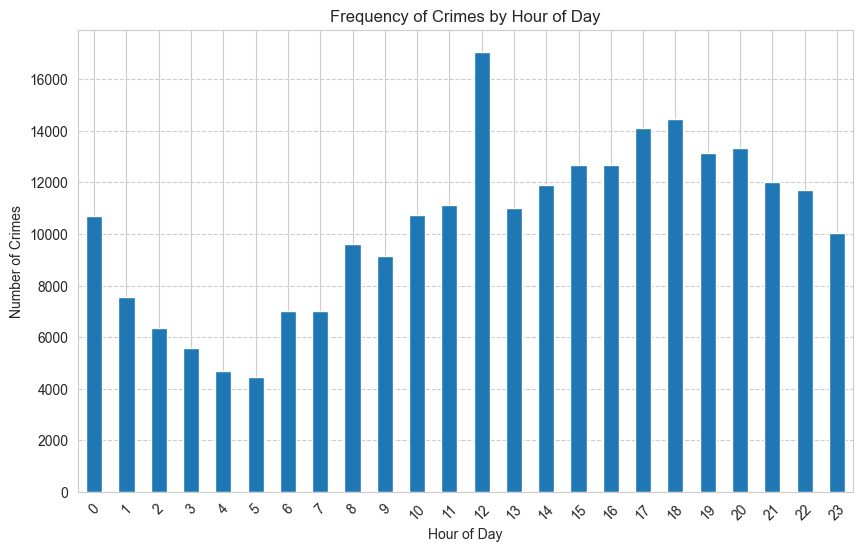

In [56]:
def frequency_plot(crime_counts):
    plt.figure(figsize=(10, 6))
    crime_counts.plot(kind='bar')
    plt.title('Frequency of Crimes by Hour of Day')
    plt.xlabel('Hour of Day')
    plt.ylabel('Number of Crimes')
    plt.xticks(range(0, 24), rotation=45)
    plt.grid(axis='y', linestyle='--')
    plt.show()


crimes['Hour of Day'] = crimes['TIME OCC'].astype(int) // 100
crime_hours = crimes['Hour of Day'].value_counts().sort_index()
peak_crime_hour = crimes['Hour of Day'].value_counts().idxmax()
frequency_plot(crime_hours)
# crimes['Hour of Day 1'] = crimes['TIME OCC'].str.zfill(4).str[:2].astype(int)
# frequency_plot(crimes['Hour of Day 1'].value_counts().sort_index())

In [57]:
# Identifying the area with the most night crime

night_crimes = crimes[(crimes['Hour of Day'] >= 22) | (crimes['Hour of Day'] <= 4)]  # 9pm to 5am
count_crime_by_area = night_crimes['AREA NAME'].value_counts()

peak_night_crime_location = count_crime_by_area.idxmax()
most_night_crimes_count = count_crime_by_area.max()

In [58]:
# Crimes by age group
print("--->", np.inf)
bins = [0, 17, 25, 34, 44, 54, 64, np.inf]
labels = ['0-17', '18-25', '26-34', '35-44', '45-54', '55-64', '65+']

crimes['Age Group'] = pd.cut(crimes['Vict Age'], bins= bins, labels= labels)
# crimes.loc[:, ['DR_NO', 'DATE OCC', 'AREA NAME', 'Vict Age', 'Age Group']].head()

victim_ages = crimes['Age Group'].value_counts()

peak_crime_hour, peak_night_crime_location, victim_ages

(12,
 'Central',
 Age Group
 0-17     66768
 18-25    28291
 26-34    47470
 35-44    42157
 45-54    28353
 55-64    20169
 65+      14747
 Name: count, dtype: int64)